Generate from another sample
--

Set `outname` to be the base filename for the output file (stored to the *.generated* directory)

Set `c2file` to be the filename of the Codec2 encoded file containing the seed

Set `seed_start_index` to be one of: `"random"`, the frame number, or more conveniently the number of seconds into the audio (for example `"27s"`)

The generator takes several minutes to complete. It will not run if the `outname`_.wav_ file already exists.

The first 5 seconds of audio are the original seed data. The remaining audio is generated from the network model specified.

Starting generator - this could take some time
Generator complete


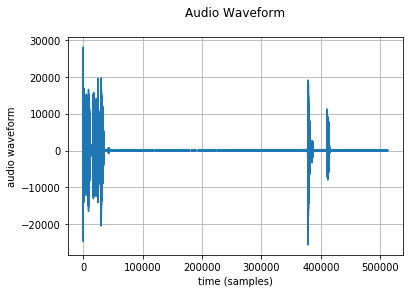

In [1]:

modelfn="out/b2-batch-v3-9-1/model-1200.h5" 
outname="b2-batch-v3-9-1-a"
c2file="test/TaleOfTwoCities_pt08.c2cb"
seed_start_index = "1169"
generate_length = int(60 / 0.04)

import network_data as nd
import os
from subprocess import check_output, call
from IPython.display import display, Markdown, Audio, Image
home = os.environ.get('HOME')

os.chdir(home + "/store/c2gen")
if os.path.isfile(home+'/store/c2gen/generated/'+outname+'.wav'):
    print("File", outname, "already exists")
else:  
    print("Starting generator - this could take some time")
    call(["python3", "lstm_c2_generation.py", "--generate="+outname, "--generate-len="+str(generate_length), "--seed_index="+seed_start_index, c2file, modelfn])
    print("Generator complete")  
display(Audio(filename=home+"/store/c2gen/generated/"+outname+".wav"))  
os.chdir(home+"/store/c2gen/notebooks") 
  
nd.plot_gen_audio_waveform(outname) 